# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [2]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [7]:
# Import data.
import pandas as pd
df = pd.read_csv("modified_c4_epa_air_quality.csv") 



## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [8]:
# First 10 rows of the data
df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [9]:
# Code Here
df.describe()

,aqi_log
count,260.000000
mean,1.766921
std,0.714716
min,0.000000
25%,1.098612
50%,1.791759
75%,2.302585
max,3.931826


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A:1.766921

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: It's the largest number.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [11]:
# Code Here
aqi_mean = df['aqi_log'].mean()
print(f"Mean AQI: {aqi_mean}")

Mean AQI: 1.7669210929985577


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [16]:
# Code Here
import pandas as pd
df = pd.read_csv("modified_c4_epa_air_quality.csv")
sampled_data = df.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [17]:
# Code Here
print(sampled_data.head(10))

     date_local      state_name    county_name   city_name  \
102  2018-01-01           Texas         Harris     Houston   
106  2018-01-01      California       Imperial    Calexico   
71   2018-01-01         Alabama      Jefferson  Birmingham   
188  2018-01-01         Arizona       Maricopa       Tempe   
20   2018-01-01        Virginia        Roanoke      Vinton   
102  2018-01-01           Texas         Harris     Houston   
121  2018-01-01  North Carolina    Mecklenburg   Charlotte   
214  2018-01-01         Florida        Broward       Davie   
87   2018-01-01      California       Humboldt      Eureka   
99   2018-01-01      California  Santa Barbara      Goleta   

                   local_site_name   parameter_name   units_of_measure  \
102                        Clinton  Carbon monoxide  Parts per million   
106          Calexico-Ethel Street  Carbon monoxide  Parts per million   
71           Arkadelphia/Near Road  Carbon monoxide  Parts per million   
188                  

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: Because sampling with replacement means a single row can be selected multiple times.

**Question:** What does `random_state` do?

A:It ensures reproducibility

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [21]:
# Code Here

sample_mean = sampled_data['aqi_log'].mean()
print(f"Sample Mean AQI: {sample_mean}")
population_mean = df['aqi_log'].mean()
print(f"Population Mean AQI: {population_mean}")
print(f"Difference: {abs(sample_mean - population_mean)}")

Sample Mean AQI: 1.6379981384419398
Population Mean AQI: 1.7669210929985577
Difference: 0.12892295455661795


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: The sample mean is calculated from a subset of the data, the population mean using the entire dataset.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [23]:
# Code Here
estimate_list = []
for _ in range(10000):
    sample = df.sample(n=50, replace=True)
    estimate_list.append(sample['aqi_log'].mean())

import numpy as np
estimate_array = np.array(estimate_list)
print(f"Mean of Sampling Distribution: {estimate_array.mean()}")

Mean of Sampling Distribution: 1.766135866896632


### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [24]:
# Code Here
import pandas as pd
estimate_df = pd.DataFrame({'sample_means': estimate_list})
estimate_df.head()

,sample_means
0,1.899382
1,1.801421
2,1.758509
3,1.634600
4,1.850050


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [26]:
# Code Here
mean_sample_means = estimate_df['sample_means'].mean()


**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [27]:
# Code Here
print(f"Mean of Sampling Distribution: {mean_sample_means}")

Mean of Sampling Distribution: 1.766135866896632


**Question:** How are the central limit theorem and random sampling (with replacement) related?

In [30]:
# Code Here
import numpy as np
import pandas as pd
estimate_list = []
for _ in range(10000):
    sample = df.sample(n=50, replace=True) 
    estimate_list.append(sample['aqi_log'].mean()) 
    estimate_df = pd.DataFrame({'sample_means': estimate_list})
    estimate_df.head()
mean_sample_means = estimate_df['sample_means'].mean()
print(f"Mean of Sampling Distribution: {mean_sample_means}")

Mean of Sampling Distribution: 1.7661509422856128


A: The CLT states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increase.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

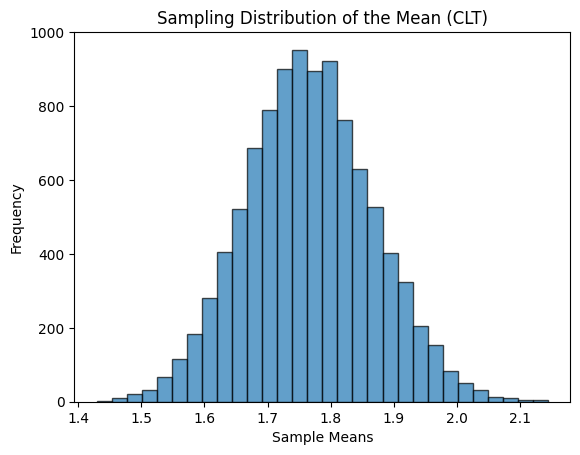

In [31]:
# Code Here
import matplotlib.pyplot as plt
plt.hist(estimate_df['sample_means'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean (CLT)')
plt.show()


### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [32]:
# Code Here
standard_error = np.std(estimate_list, ddof=1) / np.sqrt(50)
print(f"Standard Error of the Mean (SEM): {standard_error}")

Standard Error of the Mean (SEM): 0.014296507963230102


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

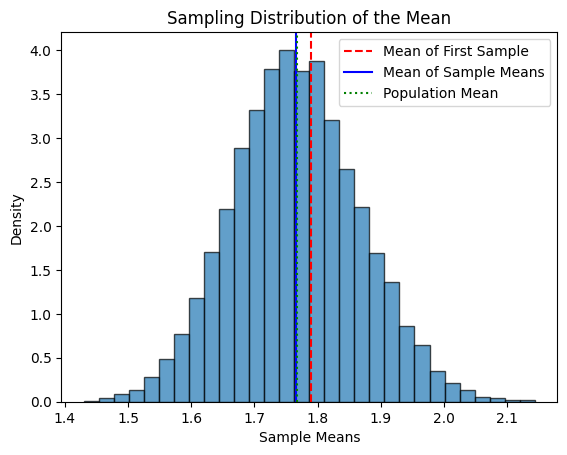

In [34]:
# Code Here
import matplotlib.pyplot as plt
plt.hist(estimate_list, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(x=estimate_list[0], color='red', linestyle='dashed', label='Mean of First Sample')
plt.axvline(x=np.mean(estimate_list), color='blue', linestyle='solid', label='Mean of Sample Means')
plt.axvline(x=df['aqi_log'].mean(), color='green', linestyle='dotted', label='Population Mean')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Sampling Distribution of the Mean')
plt.legend()
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

A:The sampling distribution of mean is quiet normal.

# Considerations

**What are some key takeaways that you learned from this project?**

A: The mean of many samples is a realiable estimate of population mean.

**What findings would you share with others?**

A: The distribution of mean is sample.

**What would you convey to external readers?**

A: Understand the condidence interval
